In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Let's generate 500 samples per class, which could also be called as generating Gaussian clouds
Nclass = 500

In [6]:
# We will generate 3 gaussian clouds i.e. 3 classes
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])  # the first Gaussian cloud will be centred at (0, -2)

In [7]:
X2 = np.random.randn(Nclass, 2) + np.array([2, 2]) # the second Gaussian cloud will be centred at (2, 2)

In [8]:
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])  # the third Gaussian cloud will be centred at (-2, 2)

In [12]:
X1[0:2]

array([[ 0.16141532, -0.86949458],
       [ 0.37966293, -1.9866493 ]])

In [14]:
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

In [22]:
X = np.vstack([X1, X2, X3]) # Stack arrays in sequence vertically (row wise).

In [24]:
X.shape

(1500, 2)

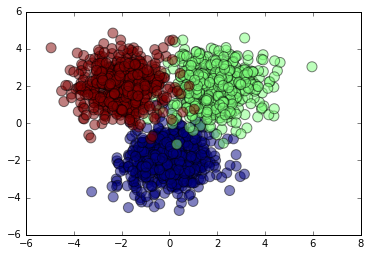

In [25]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, alpha = 0.5)
plt.show()

In [26]:
D = 2 # two dimensions, i.e. 2 input nodes
M = 3 # 3 hidden nodes
K = 3 # 3 output classes

In [27]:
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [31]:
def forward(X, W1, b1, W2, b2):
    act_ip = X.dot(W1) + b1  # input activation function
    Z = 1 / (1 + np.exp(-act_ip))  #  value of the hiden layer using sigmoid activation function
    act_op = Z.dot(W2) + b2  # activation of the hidden to output layer
    expA = np.exp(act_op)
    Y = expA / expA.sum(axis = 1, keepdims = True)  # using softmax activation function
    return Y

In [32]:
def classification_rate(Y, P): # i.e. will take target Y and predictions P
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:  # only if the prediction is correct
            n_correct += 1
    return float(n_correct) / n_total

In [33]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis = 1)  # argmax by row

assert(len(P) == len(Y))   # it checks for Truth. if the expression is False, it thorws an assertion error/exception

print("Classification Rate for randomly chosen weights: ", classification_rate(Y, P))

Classification Rate for randomly chosen weights:  0.3333333333333333


In [34]:
P_Y_given_X

array([[ 0.05311064,  0.30178901,  0.64510036],
       [ 0.053867  ,  0.31979645,  0.62633655],
       [ 0.10809924,  0.31243594,  0.57946482],
       ..., 
       [ 0.0459889 ,  0.27415762,  0.67985349],
       [ 0.03892498,  0.29621911,  0.66485591],
       [ 0.04962996,  0.25525034,  0.69511969]])

In [35]:
P_Y_given_X.shape  # total 1500 samples and 3 classes . It's an indicator matrix

(1500, 3)

In [36]:
np.argmax(P_Y_given_X, axis = 1)  # gives you the position of the column where the value is maximum

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [37]:
assert(len(P) == len(Y))